In [343]:
!pip install kaggle

In [344]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [345]:
#extract file from zip file
import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip')
zip_ref.extractall() # extract file to dir
zip_ref.close() # close file

In [346]:
#read data from the file and handle null values
import pandas as pd
from sqlalchemy import create_engine
df = pd.read_csv('orders.csv',na_values=['Not Available','unknown'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [347]:
#rename columns names ..make them lower case and replace space with underscore
df.rename(columns={'Order Id':'order_id', 'City':'city'})
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [348]:
#derive new columns discount , sale price and profit
df['discount']=df['list_price']*df['discount_percent']*.01
df['sale_price']= df['list_price']-df['discount']
df['profit']=df['sale_price']-df['cost_price']
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [349]:
#convert order date from object data type to datetime
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")

In [350]:
#drop cost price list price and discount percent columns
df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)

<ipython-input-417-a58fdf1248ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sale_price', y='product_id', data=top_products, palette='Blues_r')


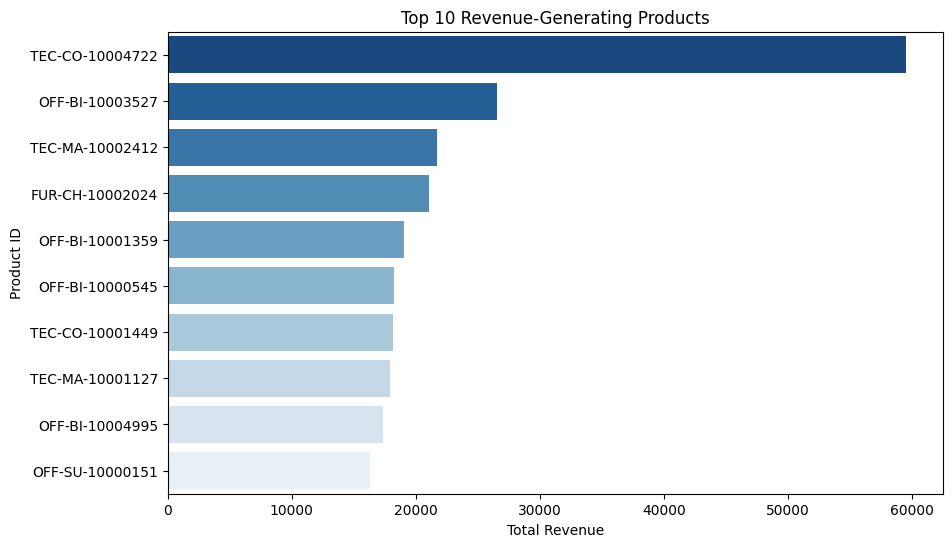

In [417]:
# Calculate total revenue per product
import matplotlib.pyplot as plt
import seaborn as sns
top_products = df.groupby('product_id')['sale_price'].sum().nlargest(10).reset_index()
# Top 10 Revenue-Generating Products
plt.figure(figsize=(10, 6))
sns.barplot(x='sale_price', y='product_id', data=top_products, palette='Blues_r')
plt.xlabel("Total Revenue")
plt.ylabel("Product ID")
plt.title("Top 10 Revenue-Generating Products")
plt.show()

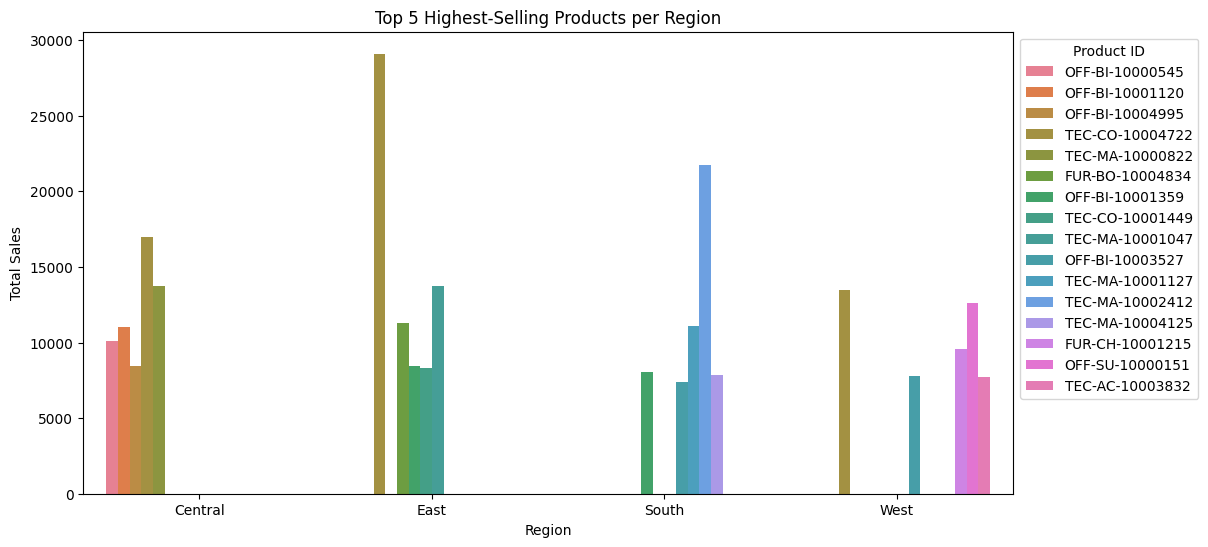

In [352]:
# Top 5 Highest-Selling Products per Region
top_selling_per_region = df.groupby(['region', 'product_id'])['sale_price'].sum().reset_index()
top_selling_per_region['rank'] = top_selling_per_region.groupby('region')['sale_price'].rank(method='first', ascending=False)
top_5_per_region = top_selling_per_region[top_selling_per_region['rank'] <= 5]

plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='sale_price', hue='product_id', data=top_5_per_region)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Top 5 Highest-Selling Products per Region")
plt.legend(title="Product ID", bbox_to_anchor=(1, 1))
plt.show()

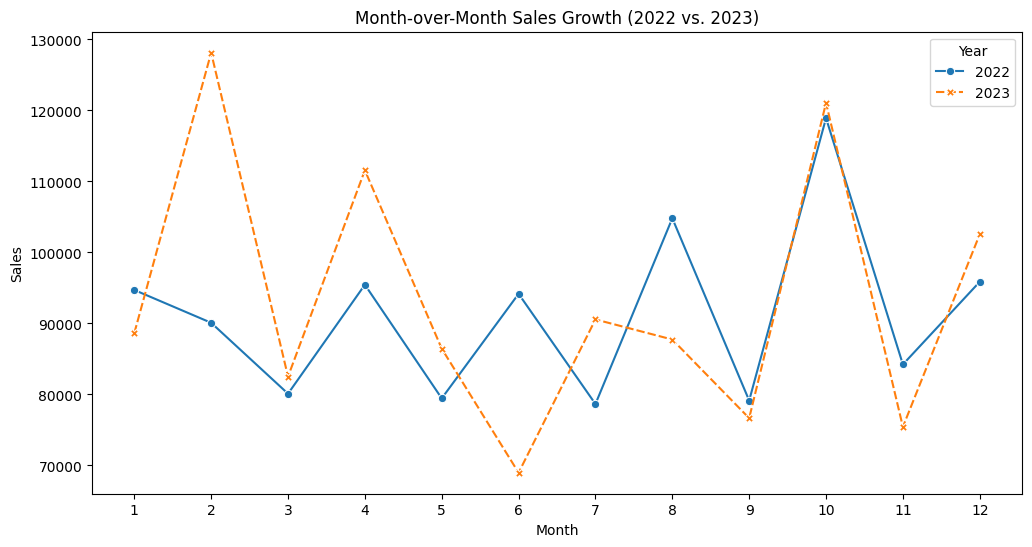

In [353]:
# Month-over-Month Sales Growth (2022 vs. 2023)
#Extract year and month for proper grouping
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Group by year and month, then pivot
monthly_sales = df.groupby(['year', 'month'])['sale_price'].sum().reset_index()
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='year', values='sale_price')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_pivot, markers=True)
plt.xticks(range(1, 13))  # Ensure months are 1-12
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Month-over-Month Sales Growth (2022 vs. 2023)")
plt.legend(title="Year")
plt.show()

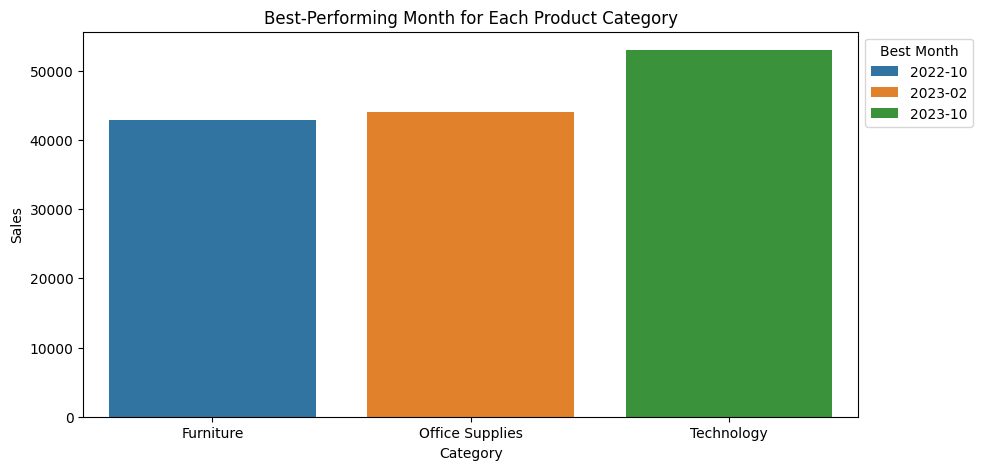

In [354]:
# Best-Performing Month for Each Product Category
category_sales = df.groupby([df['order_date'].dt.to_period('M'), 'category'])['sale_price'].sum().reset_index()
best_month_per_category = category_sales.loc[category_sales.groupby('category')['sale_price'].idxmax()]

plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='sale_price', hue='order_date', data=best_month_per_category)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Best-Performing Month for Each Product Category")
plt.legend(title="Best Month", bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-355-e91da26e9348>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='growth', data=highest_growth_subcategory, palette='coolwarm')


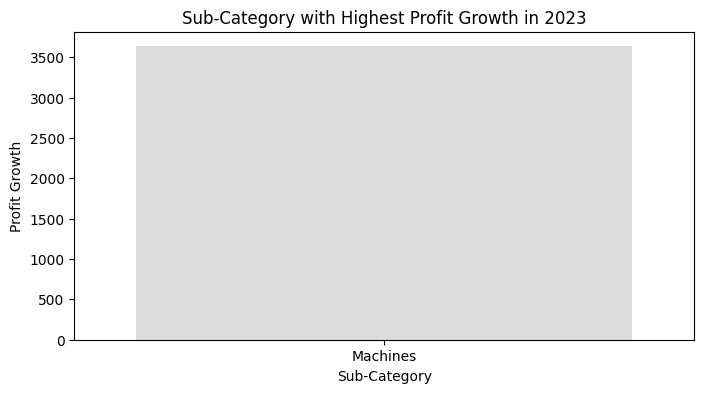

In [355]:
# Sub-category with Highest Profit Growth in 2023
df['year'] = df['order_date'].dt.year
profit_growth = df.groupby(['sub_category', 'year'])['profit'].sum().unstack().reset_index()
profit_growth['growth'] = profit_growth[2023] - profit_growth[2022]
highest_growth_subcategory = profit_growth.nlargest(1, 'growth')

plt.figure(figsize=(8, 4))
sns.barplot(x='sub_category', y='growth', data=highest_growth_subcategory, palette='coolwarm')
plt.xlabel("Sub-Category")
plt.ylabel("Profit Growth")
plt.title("Sub-Category with Highest Profit Growth in 2023")
plt.show()

In [356]:
#drop cyear and month columns
df.drop(columns=['year','month'],inplace=True)
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [357]:
#load the data into sql server using replace option
#import sqlalchemy
engine =create_engine('sqlite:///my_order_store.db')
df.to_sql('orders_sql', engine, if_exists='append',index=False)
query='select  *from orders_sql limit  10'
r=pd.read_sql(query,engine)
r

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01 00:00:00.000000,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15 00:00:00.000000,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10 00:00:00.000000,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18 00:00:00.000000,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13 00:00:00.000000,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
5,6,2022-03-13 00:00:00.000000,None,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,1.5,48.5,-1.5
6,7,2022-12-28 00:00:00.000000,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,4,0.3,9.7,-0.3
7,8,2022-01-25 00:00:00.000000,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,45.5,864.5,4.5
8,9,2023-03-23 00:00:00.000000,None,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,0.4,19.6,-0.4
9,10,2023-05-16 00:00:00.000000,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,5,3.3,106.7,16.7


In [358]:
%reload_ext sql

In [359]:
%%sql
sqlite:///my_order_store.db

In [360]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [380]:
#find top 10 highest reveue generating products
%%sql
select product_id, round(sum(sale_price), 2) as sales
from orders_sql
group by product_id
order by sales desc
limit 10;

 * sqlite:///my_order_store.db
   sqlite:///ordered_list.db
Done.


product_id,sales
TEC-CO-10004722,119028.0
OFF-BI-10003527,53050.6
TEC-MA-10002412,43468.8
FUR-CH-10002024,42192.4
OFF-BI-10001359,38180.4
OFF-BI-10000545,36498.0
TEC-CO-10001449,36302.4
TEC-MA-10001127,35812.8
OFF-BI-10004995,34709.6
OFF-SU-10000151,32651.6


In [379]:
#find top 5 highest selling products in each region
%%sql
with cte as (
select region,product_id,round(sum(sale_price),2) as sales
from orders_sql
group by region,product_id)
select * from (
select *
, row_number() over(partition by region order by sales desc) as rn
from cte) A
where rn<=5

 * sqlite:///my_order_store.db
   sqlite:///ordered_list.db
Done.


region,product_id,sales,rn
Central,TEC-CO-10004722,33950.0,1
Central,TEC-MA-10000822,27540.0,2
Central,OFF-BI-10001120,22113.0,3
Central,OFF-BI-10000545,20265.4,4
Central,OFF-BI-10004995,16832.2,5
East,TEC-CO-10004722,58198.0,1
East,TEC-MA-10001047,27534.0,2
East,FUR-BO-10004834,22548.2,3
East,OFF-BI-10001359,16927.2,4
East,TEC-CO-10001449,16632.0,5


In [392]:
#find month over month growth comparison for 2022 and 2023 sales eg : jan 2022 vs jan 2023
%%sql
with cte as (
select strftime('%Y', order_date) as order_year,
     strftime('%m', order_date) as order_month,
sum(sale_price) as sales
from orders_sql
group by strftime('%Y', order_date),
    strftime('%m', order_date)
	)
select order_month,
round(sum(case when order_year='2022' then sales else 0 end),2) as sales_2022,
round(sum(case when order_year='2023' then sales else 0 end),2) as sales_2023
from cte
group by order_month
order by order_month;

 * sqlite:///my_order_store.db
   sqlite:///ordered_list.db
Done.


order_month,sales_2022,sales_2023
01,189425.0,177265.2
02,180182.0,256248.4
03,160212.0,165024.6
04,190903.2,223137.2
05,158896.6,172895.8
06,188341.0,137953.0
07,157304.4,181127.6
08,209616.0,175467.2
09,158284.4,153317.2
10,237825.4,242123.0


In [396]:
#for each category which month had highest sales
%%sql
with cte as (
select category,strftime('%Y%m', order_date) AS order_year_month,
 round(sum(sale_price),2) as sales
from orders_sql
group by category,strftime('%Y%m', order_date)
)
select * from (
select *,
row_number() over(partition by category order by sales desc) as rn
from cte
) a
where rn=1

 * sqlite:///my_order_store.db
   sqlite:///ordered_list.db
Done.


category,order_year_month,sales,rn
Furniture,202210,85777.8,1
Office Supplies,202302,88237.0,1
Technology,202310,106000.2,1


In [416]:
#which sub category had highest growth by profit in 2023 compare to 2022
%%sql
with cte as (
    select sub_category,
    strftime('%Y', order_date) AS order_year,
    sum(sale_price) as sales
    from orders_sql
    group by sub_category, strftime('%Y', order_date)
),
cte2 as (
    select sub_category,
    round(sum(case when order_year='2022' then sales else 0 end),2) as sales_2022,
 round(sum(case when order_year='2023' then sales else 0 end),2) as sales_2023
    from cte
    group by sub_category
)
select *,(sales_2023 - sales_2022) as growth_in_profit
from  cte2
order by growth_in_profit desc
limit 1;


 * sqlite:///my_order_store.db
   sqlite:///ordered_list.db
Done.


sub_category,sales_2022,sales_2023,growth_in_profit
Machines,147446.4,218357.0,70910.6
